In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [ ]:
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
  '''
  Calcular la raíz de una función por medio del método de Regula Falsi
  Parámetros:
  - f : función a evaluar
  - a : límite del intervalo (inicial)
  - b : límite del intervalo (final)
  - tol : tolerancia
  - max_iter : número máximo de iteraciones
  Retorna:
  - c : raíz de la función
  '''
  if f(a) * f(b) >= 0:
    raise ValueError("Las funciones deben tener signos opuestos")

  for i in range(max_iter + 1):
    c = ((a * f(b)) - (b * f(a))) / (f(b) - f(a)) # Cálculo del punto de intersección
    if abs(f(c)) < tol:
      break

    if f(c) * f(a) < 0:
      a = c
    elif f(b) * f(c) < 0:
      b = c

  return c, i

# Con la función de ejemplo
def f(x):
  return x**2 - 4

# Encontrar la raíz por método Regula Falsi
raiz, num_iteraciones = regula_falsi(f, 1, 3, tol=1e-8, max_iter=100)
print(f"La raíz es: {raiz}")
print(f"Número de iteraciones: {num_iteraciones}")

La raíz es: 1.9999999994797542
Número de iteraciones: 8


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

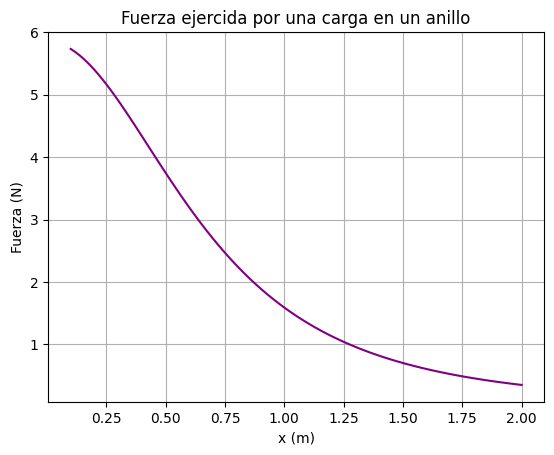


Método de NeWton-Raphson:
F(1.1401) = 1.2500 N
Número de iteraciones: 90

Método de Bisección:
F(1.1401) = 1.2500 N
Número de iteraciones: 26


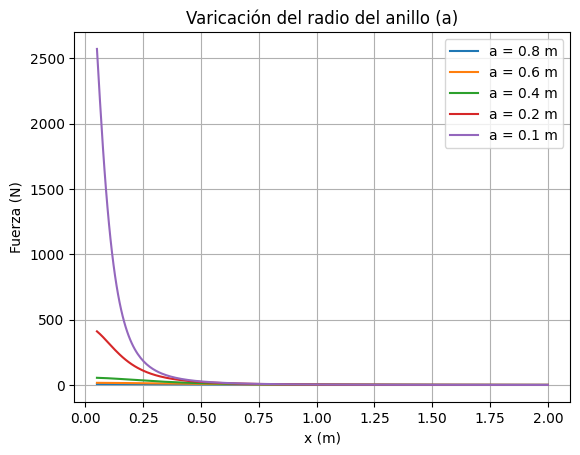

In [ ]:
def fuerza(a, x, q=2e-5, Q=2e-5, epsilon0=8.854e-12):
  '''
  Calcular la fuerza ejercida sobre una carga q por un anillo de radio a
  Parámetros:
  - a : radio del anillo
  - x : distancia horizontal a la carga q
  - q, Q : cargas
  - epsilon0 : permitividad eléctrica del vacío
  Retorna:
  - fuerza ejercida sobre la carga por el anillo
  '''
  k = 1 / (4 * np.pi * epsilon0)
  return (k * q * Q) / ((x**2 + a**2)**(3/2))

# Datos del anillo para graficar
a = 0.85 # Radio anillo
x = np.linspace(0.1, 2.0, 100) # Distancias de x
F = fuerza(a, x)

# Graficar
plt.plot(x, F, color='purple')
plt.xlabel('x (m)')
plt.ylabel('Fuerza (N)')
plt.title('Fuerza ejercida por una carga en un anillo')
plt.grid()
plt.show()

# Función y la derivada de f(x) = F(x) - 1.25 = 0
def f(x):
  return fuerza(a, x) - 1.25

def df(x, a=0.85, q=2e-5, Q=2e-5, epsilon0=8.854e-12):
    num = q * Q * ((x**2 + a**2)**(3/2) - 3*x**2*(x**2 + a**2)**(1/2))
    den = ((x**2 + a**2)**3)
    return (1 / (4 * np.pi * epsilon0)) * (num / den)

# Método de Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-8, max_iter=100):
  x = x0
  for i in range(max_iter + 1):
    fx = f(x)
    if abs(fx) < tol:
      break
    dfx = df(x)
    if dfx == 0:
      raise ValueError("La derivada no puede ser cero")
    x = x - fx / dfx
  return x, i

# Aplicar método de Newton-Raphson
raiz_n, iteraciones = newton_raphson(f, df, 1.0)
print(f"\nMétodo de NeWton-Raphson:")
print(f"F({raiz_n:.4f}) = {fuerza(a, raiz_n):.4f} N")
print(f"Número de iteraciones: {iteraciones}")

# Método de bisección
def biseccion(f, a, b, tol=1e-8, max_iter=100):
  if f(a) * f(b) >= 0:
    raise ValueError("Las funciones deben tener signos opuestos")
  for i in range(max_iter + 1):
    c = (a + b) / 2
    if abs(f(c)) < tol:
      break
    if f(c) * f(a) < 0:
      b = c
    elif f(b) * f(c) < 0:
      a = c
  return c, i

# Aplicar método de bisección
raiz_b, iteraciones = biseccion(f, 0.5, 2.0)
print(f"\nMétodo de Bisección:")
print(f"F({raiz_b:.4f}) = {fuerza(a, raiz_b):.4f} N")
print(f"Número de iteraciones: {iteraciones}")

# Disminución de radios
radios = [0.8, 0.6, 0.4, 0.2, 0.1]
x_radios = np.linspace(0.05, 2, 300)

# Gráfica
for a_r in radios:
  F_r = fuerza(a_r, x_radios)
  plt.plot(x_radios, F_r, label=f'a = {a_r} m')

plt.title("Varicación del radio del anillo (a)")
plt.xlabel("x (m)")
plt.ylabel("Fuerza (N)")
plt.legend()
plt.grid()
plt.show()


Si disminuimos el radio, la fuerza ejercida sobre la carga del anillo crecerá. Como se observa en el gráfico, con a = 0.1 m la fuerza aumenta en cierta distancia x, hasta luego normalizarse.

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



<ipython-input-32-3b22a19b95bb>:14: RuntimeWarning: invalid value encountered in log
  return u * np.log(m0 / (m0 - q * t)) - (g * t)


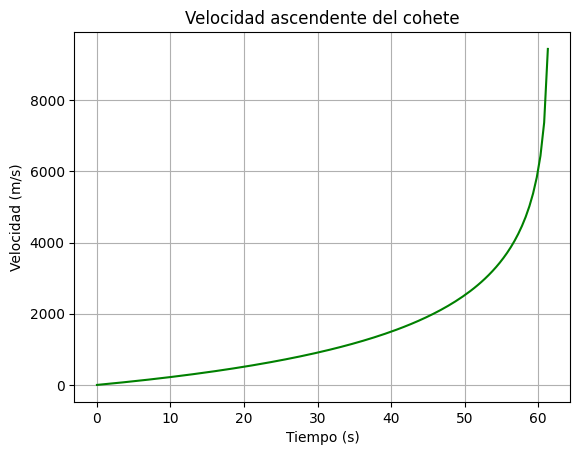


Método de Newton-Raphson:
t = 26.4078 s
Número de iteraciones: 4

Método de Bisección:
t = 26.4078 s
Número de iteraciones: 35

Método de Regula Falsi:
t = 26.4078 s
Número de iteraciones: 17


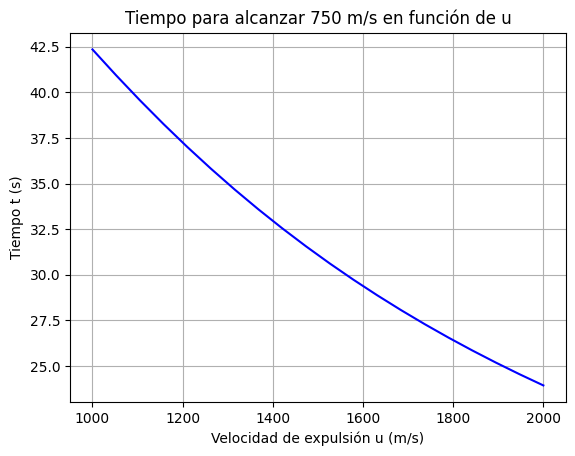

In [32]:
# Función de la velocidad
def velocidad(t, u, m0, q, g=9.81):
  '''
  Calcular la velocidad ascendente de un cohete
  Parámetros:
  - t : tiempo
  - u : velocidad a la que se expulsa el combustible
  - m0 : masa inicial del cohete
  - q : razón de consumo del combustible
  - g : aceleración de la gravedad
  Retorna:
  - velocidad ascendente del cohete
  '''
  return u * np.log(m0 / (m0 - q * t)) - (g * t)

# Parámetros
u = 1800
m0 = 1.6e5
q = 2600
# Rango de t para la gráfica de v(t)
t_rango = np.linspace(0, 100, 200)
v_valores = velocidad(t_rango, u, m0, q)

# Graficar
plt.plot(t_rango, v_valores, color='green')
plt.title('Velocidad ascendente del cohete')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid()
plt.show()

# Encontrar el valor de t para v = 750 m/s

# Función y su derivada
def f(t):
  return velocidad(t, u, m0, q) - 750

def df(t):
  return (u * q) / (m0 - q * t) - 9.81

# Método Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-8, max_iter=100):
  x = x0
  for i in range(max_iter + 1):
    fx = f(x)
    if abs(fx) < tol:
      break
    dfx = df(x)
    if dfx == 0:
      raise ValueError("La derivada no puede ser cero")
    x = x - fx / dfx
  return x, i

# Aplicar método
raiz_n, iteraciones_n = newton_raphson(f, df, x0=30)
print(f"\nMétodo de Newton-Raphson:")
print(f"t = {raiz_n:.4f} s")
print(f"Número de iteraciones: {iteraciones_n}")

# Método de bisección
def biseccion(f, a, b, tol=1e-8, max_iter=100):
  if f(a) * f(b) >= 0:
    raise ValueError("Las funciones deben tener signos opuestos")
  for i in range(max_iter + 1):
    c = (a + b) / 2
    if abs(f(c)) < tol:
      break
    if f(c) * f(a) < 0:
      b = c
    elif f(b) * f(c) < 0:
      a = c
  return c, i

# Aplicar método
raiz_b, iteraciones_b = biseccion(f, 10, 40)
print(f"\nMétodo de Bisección:")
print(f"t = {raiz_b:.4f} s")
print(f"Número de iteraciones: {iteraciones_b}")

# Método de Regula Falsi
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
  if f(a) * f(b) >= 0:
    raise ValueError("Las funciones deben tener signos opuestos")
  for i in range(max_iter + 1):
    c = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))
    if abs(f(c)) < tol:
      break
    if f(c) * f(a) < 0:
      b = c
    elif f(b) * f(c) < 0:
      a = c
  return c, i

# Aplicar método
raiz_rf, iteraciones_rf = regula_falsi(f, 10, 40)
print(f"\nMétodo de Regula Falsi:")
print(f"t = {raiz_rf:.4f} s")
print(f"Número de iteraciones: {iteraciones_rf}")

# Variar u
u_valores = np.linspace(1000, 2000, 20)
t_valores = []

for u in u_valores:
  def f(t):
    return velocidad(t, u, m0, q) - 750
  raiz_n, _ = newton_raphson(f, df, x0=30)
  t_valores.append(raiz_n)

# Graficar resultados
plt.plot(u_valores, t_valores, color='blue')
plt.title('Tiempo para alcanzar 750 m/s en función de u')
plt.xlabel('Velocidad de expulsión u (m/s)')
plt.ylabel('Tiempo t (s)')
plt.grid()
plt.show()

Como se puede observar en el gráfico, a menor velocidad de expulsión (menores valores de u), mayor es el tiempo necesario para alcanzar los 750 m/s; y viceversa, cuando los valores de u son mayores, el tiempo es menor. Por esta razón podemos observar una gráfica decreciente